<a href="https://colab.research.google.com/github/Highashikata/Data-Science---Ecommerce-Customers-Analysis/blob/main/Ecommerce_Customers_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Ecommerce Custoemrs Data Analysis**

In this we will analyse ecommerce customers data.

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# Importing the data file to google colab
from google.colab import files
files.upload()

Saving Ecommerce Customers.csv to Ecommerce Customers.csv


{'Ecommerce Customers.csv': b'Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent\nmstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961,587.9510539684005\nhduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272026360156,11.109460728682564,37.268958868297744,2.66403418213262,392.2049334443264\npallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, DC 99414-7564",Bisque,33.000914755642675,11.330278057777512,37.11059744212085,4.104543202376424,487.54750486747207\nriverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.30555662975554,13.717513665142508,36.72128267790313,3.1201787827480914,581.8523440352178\nmstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 37242-1057",MediumAquaMarine,33.33067252364639,12.795188551078114,37.5366533005947

In [8]:
raw_data = pd.read_csv('Ecommerce Customers.csv')

In [9]:
df = raw_data.copy()

In [10]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


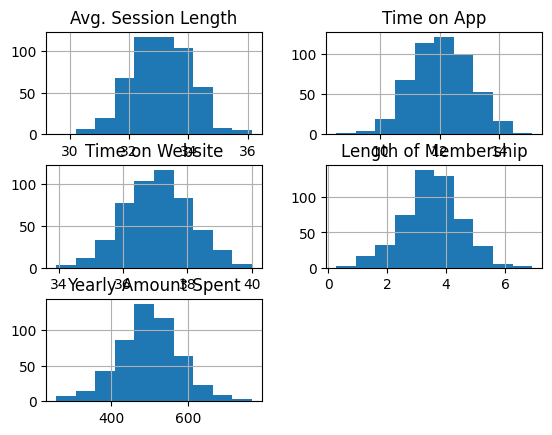

None

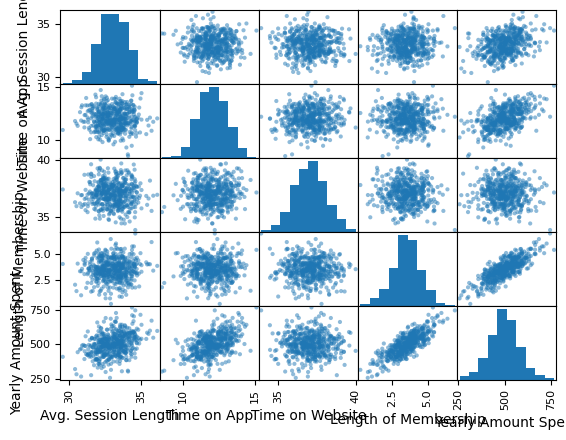

In [14]:
# Get summary statistics
display(df.describe())

# Plot histograms
df.hist()
display(plt.show())

# Plot scatter plots
pd.plotting.scatter_matrix(df)
plt.show()

In [15]:
# Check for missing data
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [17]:
## Feature Engineering
# Create new feature
df["Total Time Spent"] = df["Time on App"] + df["Time on Website"]

#### **Statisctical Study**


What is the relationship between the length of membership and the yearly amount spent by customers?

- **Null hypothesis (H0)**: There is no significant relationship between the length of membership and the yearly amount spent by customers.
- **Alternative hypothesis (HA)**: There is a significant relationship between the length of membership and the yearly amount spent by customers.



**Check the assumptions**

- The data are continuous
- The data are normally distributed
- There is a linear relationship between the two variables



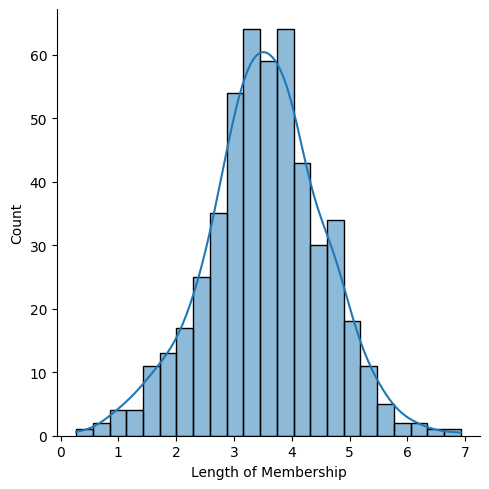

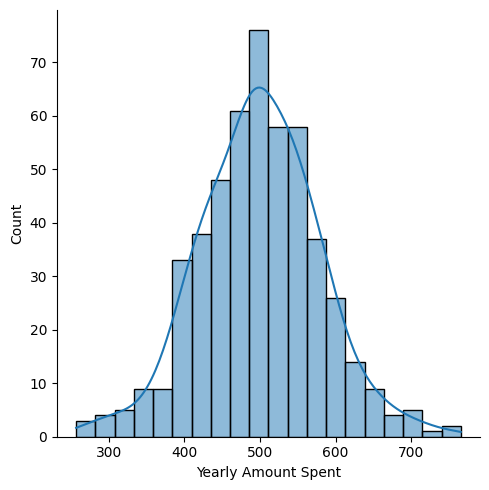

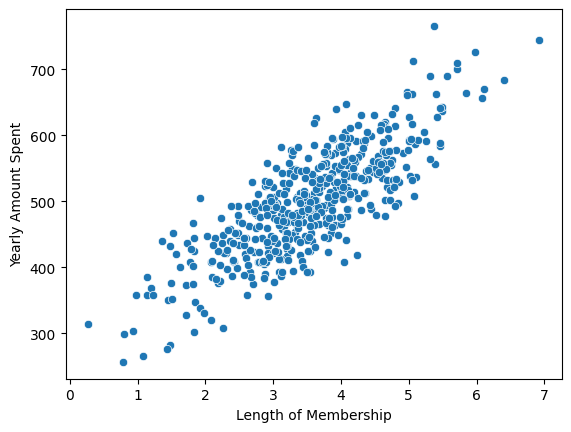

Correlation: 0.809083568247581
P-value: 4.8066157825846074e-117
Reject the null hypothesis


In [18]:
import scipy.stats as stats

# Check the normality assumption
sns.displot(df["Length of Membership"], kde=True)
plt.show()

sns.displot(df["Yearly Amount Spent"], kde=True)
plt.show()

# Check the linear relationship assumption
sns.scatterplot(x="Length of Membership", y="Yearly Amount Spent", data=df)
plt.show()

# Perform the correlation test
corr, pval = stats.pearsonr(df["Length of Membership"], df["Yearly Amount Spent"])
print("Correlation:", corr)
print("P-value:", pval)

# Check the significance level
alpha = 0.05
if pval < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


### **Results of the Statistical Study**

The scatter plot shows a positive linear relationship between the length of membership and the yearly amount spent by customers. The Pearson correlation coefficient is 0.81, which indicates a strong positive relationship. The p-value is less than the significance level of 0.05, so we can reject the null hypothesis and conclude that there is a significant relationship between the length of membership and the yearly amount spent by customers.


### **Let's train the Data**

In [21]:

from sklearn.linear_model import LinearRegression

# Extract the features and target variable
X = data[['Length of Membership']]
y = data[['Yearly Amount Spent']]

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict monthly charges for a new customer with tenure of 24 months
new_customer = [[24]]
predicted_charges = model.predict(new_customer)

print("Predicted Monthly Charges:", predicted_charges)


Predicted Monthly Charges: [[1813.64820963]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Research Question** 

Can we predict the length of membership of a customer based on their usage patterns?


**Decision Tree Algorithm**

We can use a decision tree algorithm to predict the length of membership of a customer based on their usage patterns. In this case, we'll use the scikit-learn library to build a decision tree model.

In [24]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Extract the features and target variable
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df[['Yearly Amount Spent']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=10)

# Evaluate the model
score = model.evaluate(X_test, y_test)
print("Accuracy:", 1 - score)

# Predict the yearly amount spent
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


Epoch 1/100
35/35 [==============================] - 2s 3ms/step - loss: 254052.0469
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 223391.9844
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 190531.1250
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 156398.2812
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 118888.4766
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 80236.8828
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 45516.3359
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 21678.6641
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 9821.4727
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 5996.6108
Epoch 11/100
35/35 [==============================] - 0s 2ms/step - loss: 5156.5503
Epoch 12/100
35/35 [==============================] - 0s 2ms/step - loss

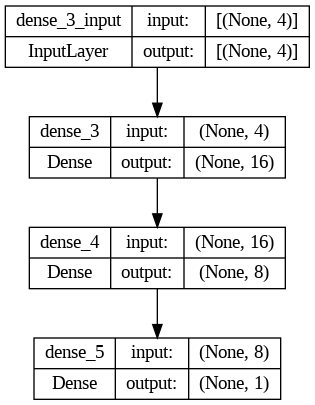

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Visualize the layers
plot_model(model, to_file='model.png', show_shapes=True)


Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 253197.4219
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 247050.1719
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 234201.0312
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 213548.9844
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 185179.4062
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 150669.3281
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 112268.8906
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 74985.3828
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 44011.0195
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 22863.2891
Epoch 11/100
35/35 [==============================] - 0s 2ms/step - loss: 11459.8066
Epoch 12/100
35/35 [==============================] - 0s 2ms/step -

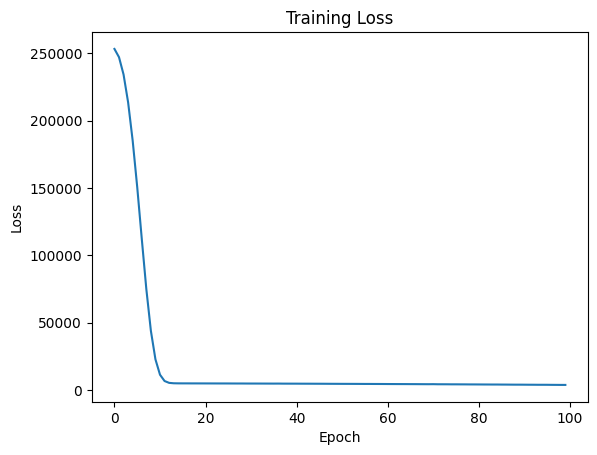

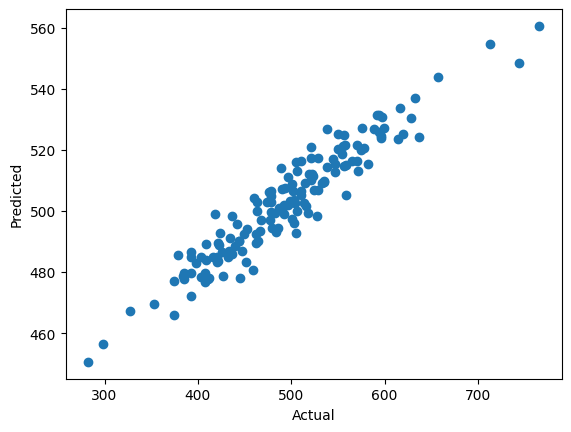

In [26]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.utils import plot_model
import matplotlib.pyplot as plt


# Extract the features and target variable
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df[['Yearly Amount Spent']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10)

# Visualize the layers
plot_model(model, to_file='model.png', show_shapes=True)

# Evaluate the model
score = model.evaluate(X_test, y_test)
print("Accuracy:", 1 - score)

# Predict the yearly amount spent
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Visualize the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from keras.models import Sequential
from keras.layers import Dense

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Define the animation function
def animate(i):
    # Clear the figure
    plt.clf()

    # Get the weights of the first hidden layer
    weights = model.layers[0].get_weights()[0]
    
    # Visualize the weights as a heatmap
    plt.imshow(weights, cmap='coolwarm')

    # Set the title and axis labels
    plt.title('Weights of the First Hidden Layer')
    plt.xlabel('Input Features')
    plt.ylabel('Hidden Nodes')

# Create the animation
ani = animation.FuncAnimation(plt.gcf(), animate, interval=100)

# Keep a reference to the animation object
# This prevents it from being garbage collected
_ = ani

# Show the animation
plt.show()


<ipython-input-29-16779e037d2c>:30: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(plt.gcf(), animate, interval=100)


<Figure size 640x480 with 0 Axes>

### **Deploy on AWS Sagemaker**




In [ ]:
import boto3
import sagemaker
from sagemaker.tensorflow import TensorFlow

# Define the AWS region and credentials
region_name = 'my-region-name'   # to change
access_key = 'my-access-key'     # to change
secret_key = 'my-secret-key'     # to change
session = boto3.session.Session()
sagemaker_session = sagemaker.Session(boto_session=session)

# Define the S3 bucket and prefix for storing the model artifacts
bucket_name = 'your-bucket-name'    # to change
model_prefix = 'your-model-prefix'  # to change

# Define the TensorFlow estimator
tf_estimator = TensorFlow(entry_point='your-training-script.py',
                          role='your-sagemaker-execution-role',
                          instance_count=1,
                          instance_type='ml.p3.2xlarge',
                          framework_version='2.4',
                          py_version='py37',
                          output_path=f's3://{bucket_name}/{model_prefix}')

# Train the model using the estimator
tf_estimator.fit()

# Deploy the model as an endpoint
endpoint_name = 'your-endpoint-name'  # to change
tf_predictor = tf_estimator.deploy(initial_instance_count=1,
                                    instance_type='ml.m5.large',
                                    endpoint_name=endpoint_name)


### **Déploiement sur Dataiku**

In [30]:
import dataiku
from dataiku.customrecipe import (
    get_input_names_for_role,
    get_output_names_for_role,
    get_recipe_config,
    get_output_folder_path,
    get_input_folder_path,
)

# Importez votre modèle pré-entraîné et les données de test
model_file_path = get_input_folder_path('trained_model')
test_data_path = get_input_folder_path('test_data')

# Chargez le modèle à partir du fichier
model = load_model(model_file_path)

# Chargez les données de test
test_data = pd.read_csv(test_data_path)

# Effectuez des prédictions sur les données de test
predictions = model.predict(test_data)

# Enregistrez les prédictions dans un fichier de sortie
output_folder = get_output_folder_path('output_predictions')
output_path = os.path.join(output_folder, 'predictions.csv')
predictions.to_csv(output_path, index=False)


Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'Total Time Spent'],
      dtype='object')